In [1]:
# 01_Advanced_Data_Exploration.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options for better visualization
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [3]:
# Load the dataset
df = pd.read_csv('../data/StudentsPerformance.csv')

In [4]:
# Initial Data Overview
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check for missing values and duplicates - This should be done first
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate Rows:
0



Distribution of Scores:


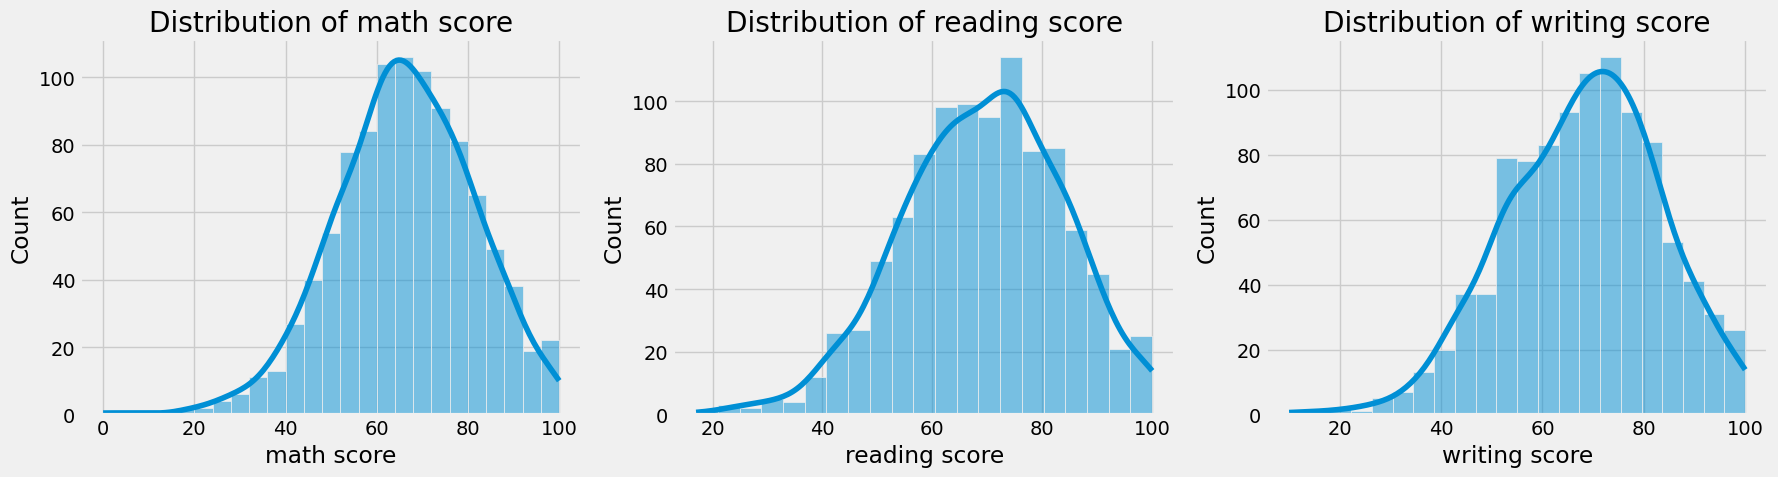

In [6]:
# 1. Univariate Analysis (Individual features)
print("\nDistribution of Scores:")
plt.figure(figsize=(18, 5))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Score Correlation Heatmap:


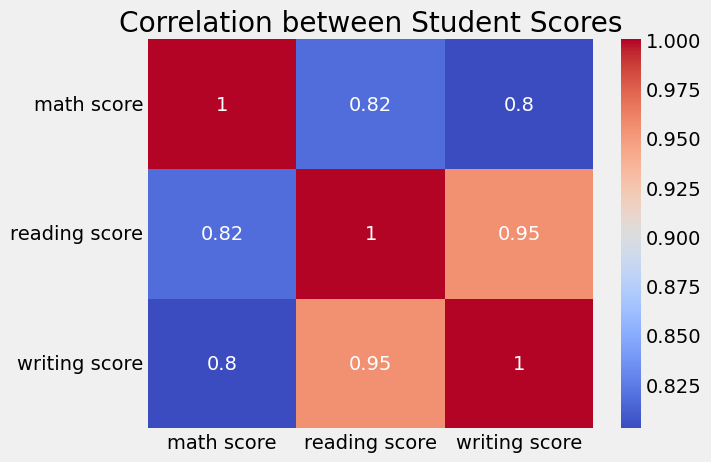

In [7]:
# 2. Bivariate Analysis (Relationship between two features)
print("\nScore Correlation Heatmap:")
score_cols = ['math score', 'reading score', 'writing score']
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Student Scores')
plt.show()


Impact of Test Preparation and Lunch on Scores:


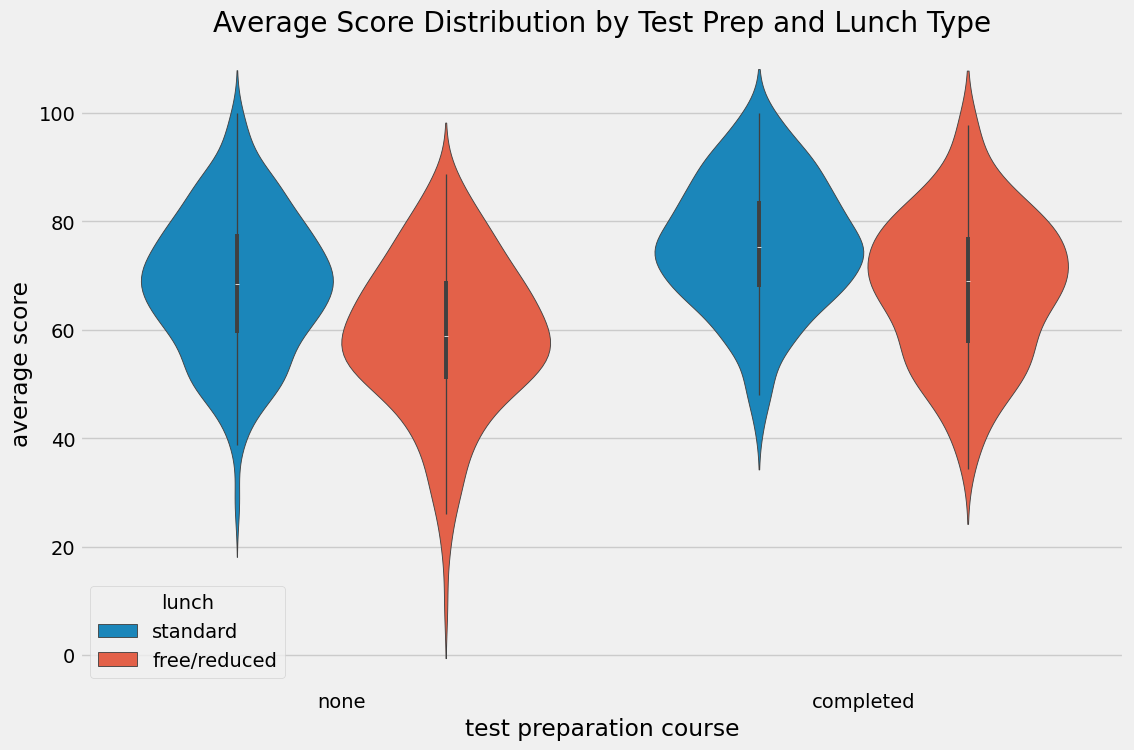

In [8]:
# 3. Multivariate Analysis (Relationship between multiple features)
print("\nImpact of Test Preparation and Lunch on Scores:")

# Create 'average score' column if it doesn't exist
if 'average score' not in df.columns:
	df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.figure(figsize=(12, 8))
sns.violinplot(x='test preparation course', y='average score', hue='lunch', data=df)
plt.title('Average Score Distribution by Test Prep and Lunch Type')
plt.show()

In [9]:
# Create an 'average score' column for subsequent analysis
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [11]:
# Print findings
print("\nExploratory Data Analysis Findings:")
print("- Scores are highly correlated, indicating holistic performance.")
print("- Test preparation has a significant positive impact on all scores.")
print("- Students with 'standard' lunch (proxy for higher socio-economic status) tend to have higher scores.")


Exploratory Data Analysis Findings:
- Scores are highly correlated, indicating holistic performance.
- Test preparation has a significant positive impact on all scores.
- Students with 'standard' lunch (proxy for higher socio-economic status) tend to have higher scores.
